# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1689206418648.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Volume,Open,High,Low
0,07/11/2023,4439.26,--,4415.55,4443.64,4408.46
1,07/10/2023,4409.53,--,4394.23,4412.60,4389.92
2,07/07/2023,4398.95,--,4404.54,4440.39,4397.40
3,07/06/2023,4411.59,--,4422.62,4422.62,4385.05
4,07/05/2023,4446.82,--,4442.04,4454.06,4436.61
...,...,...,...,...,...,...
2532,07/18/2013,1689.37,--,1681.05,1693.12,1681.05
2533,07/17/2013,1680.91,--,1677.91,1684.75,1677.91
2534,07/16/2013,1676.26,--,1682.70,1683.73,1671.84
2535,07/15/2013,1682.50,--,1679.59,1684.51,1677.89


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2537.000000,2537.000000,2537.000000,2537.000000
mean,2867.850292,2851.079468,2866.570946,2834.401876
std,878.477229,912.260182,918.976208,905.301082
min,1630.480000,0.000000,0.000000,0.000000
25%,2085.180000,2083.790000,2093.810000,2075.580000
50%,2707.880000,2706.490000,2727.260000,2691.430000
75%,3677.950000,3684.280000,3706.740000,3645.870000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2516.000000,2516.000000,2516.000000,2516.000000
mean,2875.402182,2874.876236,2890.497015,2858.059444
std,878.143904,877.910939,884.524266,871.075060
min,1630.480000,1630.250000,1640.080000,1627.470000
25%,2088.892500,2089.352500,2097.315000,2079.482500
50%,2713.525000,2715.510000,2731.735000,2699.165000
75%,3693.577500,3693.572500,3712.097500,3659.850000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2536
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2516 non-null   object 
 1   Close/Last  2516 non-null   float64
 2   Volume      2516 non-null   object 
 3   Open        2516 non-null   float64
 4   High        2516 non-null   float64
 5   Low         2516 non-null   float64
dtypes: float64(4), object(2)
memory usage: 137.6+ KB


In [5]:
df.shape

(2516, 6)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

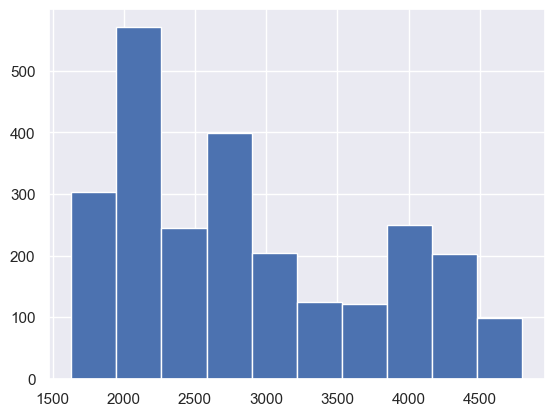

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

4439.26

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

2875.402182034983

In [10]:
close_sd = df['Close/Last'].std()
close_sd

878.1439035862034

In [11]:
sigma1 = close_mean + close_sd
sigma1

3753.5460856211866

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

4631.68998920739

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

5070.761941000492

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2536
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2516 non-null   datetime64[ns]
 1   Close/Last  2516 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2013-07-12 to 2023-07-11')

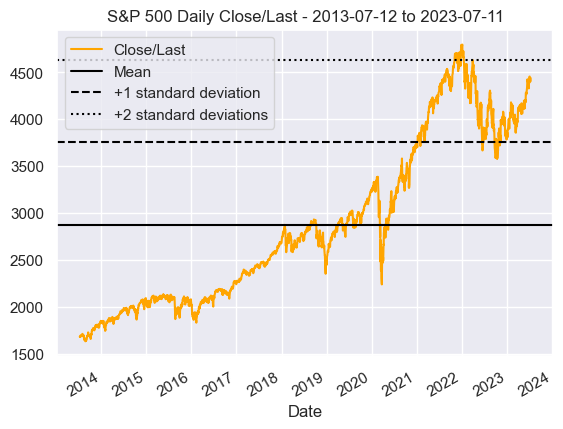

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2013-07-12 to 2023-07-11')

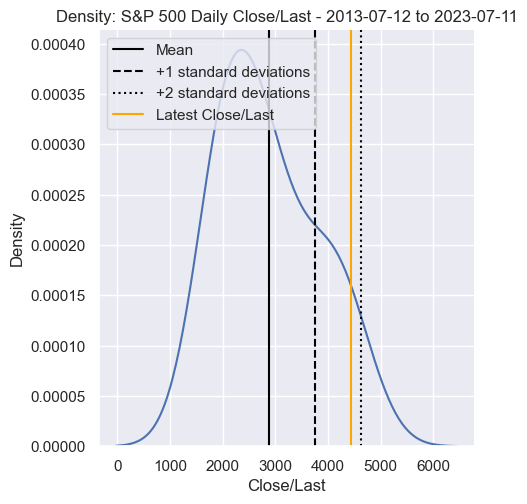

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

1.780867363057996

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results